In [2]:
#Shangguan, W., Y. (2013), A China Dataset of Soil Properties for Land Surface Modeling,Journal of Advances in Modeling Earth Systems, doi:10.1002/jame.20026.
#http://globalchange.bnu.edu.cn/research/soil2d.jsp
from netCDF4 import Dataset
import numpy as np

In [3]:
path = r'G:\china_geodata\china_soil\PH.nc'
data = Dataset(path, 'r')

In [21]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    dimensions(sizes): depth(8), lat(4320), lon(7560)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 depth(depth), float32 SOM(depth,lat,lon), int32 RSOM(depth,lat,lon)
    groups: 

In [54]:
data['lon'][0],data['lat'][-1]

(73.004166, 53.995834)

In [37]:
a.shape

(4320, 7560)

In [4]:
def writeTiff(im_data,im_width,im_height,im_bands,im_geotrans,im_proj,path):
    if 'int8' in im_data.dtype.name:
        datatype = gdal.GDT_Byte
    elif 'int16' in im_data.dtype.name:
        datatype = gdal.GDT_UInt16
    else:
        datatype = gdal.GDT_Float32

    if len(im_data.shape) == 3:
        im_bands, im_height, im_width = im_data.shape
    elif len(im_data.shape) == 2:
        im_data = np.array([im_data])
    else:
        im_bands, (im_height, im_width) = 1,im_data.shape
        #创建文件
    driver = gdal.GetDriverByName("GTiff")
    dataset = driver.Create(path, im_width, im_height, im_bands, datatype)
    if(dataset!= None):
        dataset.SetGeoTransform(im_geotrans) #写入仿射变换参数
        dataset.SetProjection(im_proj) #写入投影
    for i in range(im_bands):
        dataset.GetRasterBand(i+1).WriteArray(im_data[i])
    del dataset

In [5]:
from osgeo import gdal
import matplotlib.pyplot as plt 

a = np.mean(data['PH'][:2,::-1,:], axis=0)/1.724


plt.imshow(a)
plt.colorbar()

In [8]:
ds = gdal.Open(r'G:\china_geodata\China_soil_1km\ChinaSoil_1km.tif')
prj = ds.GetProjection()
tr = (73.004166, 0.008334, 0.0, 53.995834, 0.0, -0.008334)
#writeTiff(a,7560, 4320, 1,tr, prj,r'G:\china_geodata\yunnan_region\soc.tif')

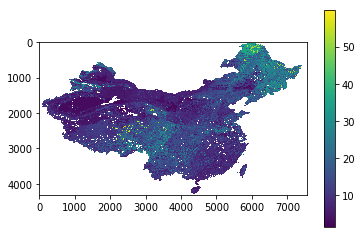

In [14]:
#TN
path_n = r'G:\china_geodata\china_soil\AL.nc'
data_n = Dataset(path_n, 'r')
b = np.mean(data_n['CEC'][:2,::-1,:], axis=0)
plt.imshow(b)
plt.colorbar()
writeTiff(b,7560, 4320, 1,tr, prj,r'G:\china_geodata\yunnan_region\cec.tif')

In [12]:
data_n 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    dimensions(sizes): depth(8), lat(4320), lon(7560)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 depth(depth), float32 BD(depth,lat,lon), int32 RBD(depth,lat,lon)
    groups: 

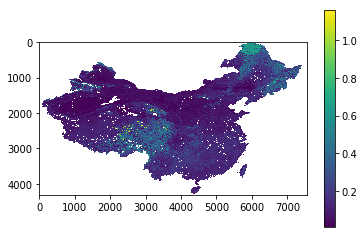

In [6]:
path_n = r'G:\china_geodata\china_soil\TN.nc'
data_n = Dataset(path_n, 'r')

b = np.mean(data_n['TN'][:2,::-1,:], axis=0)
plt.imshow(b)
plt.colorbar()
writeTiff(b,7560, 4320, 1,tr, prj,r'G:\china_geodata\yunnan_region\tn.tif')

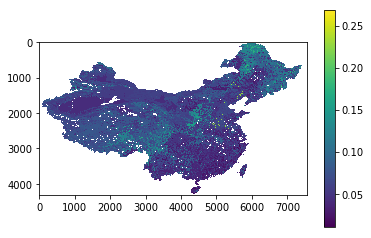

In [8]:
#Tp
path_p = r'G:\china_geodata\china_soil\TP.nc'
data_p = Dataset(path_p, 'r')
c = np.mean(data_p['TP'][:2,::-1,:], axis=0)
plt.imshow(c)
plt.colorbar()
writeTiff(c,7560, 4320, 1,tr, prj,r'G:\china_geodata\yunnan_region\tp.tif')

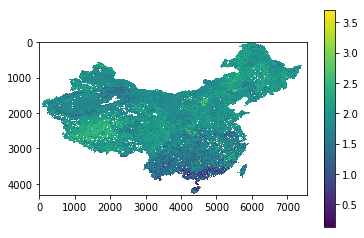

In [22]:
#TK
path_k = r'G:\china_geodata\china_soil\TK.nc'
data_k = Dataset(path_k, 'r')
b = np.mean(data_k['TK'][:2,::-1,:], axis=0)
plt.imshow(b)
plt.colorbar()
writeTiff(b,7560, 4320, 1,tr, prj,r'G:\china_geodata\yunnan_region\tk.tif')

In [10]:
22/5

4